## Demand forecasting of a popular shop item

In [170]:
#https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/#:~:text=Autoregression%20is%20a%20time%20series,at%20the%20next%20time%20step.
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import pandas as pd
import seaborn as sns

In [171]:
series = read_csv('small-shop-demand.csv', header=0, index_col=0)

print(series.head())
series.info()

          Sales
Date           
1/1/2009     25
2/1/2009     13
3/1/2009     13
4/1/2009     13
5/1/2009     13
<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 1/1/2009 to 12/1/2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   132 non-null    int64
dtypes: int64(1)
memory usage: 2.1+ KB


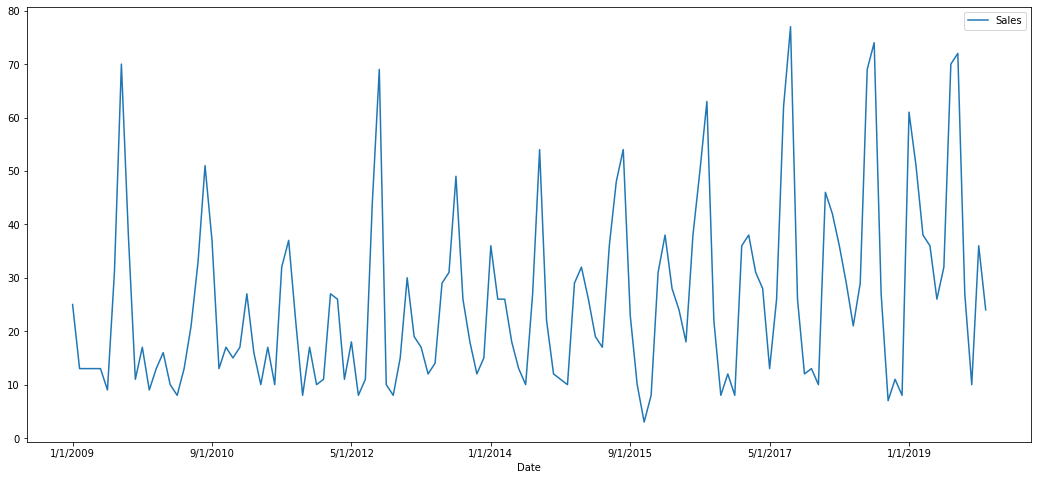

In [172]:
series.plot()
pyplot.show()

### Check for Autocorrelation

In [173]:
##from pandas import DataFrame
##from pandas import concat
##series = read_csv('small-shop-demand.csv', header=0, index_col=0)
##values = DataFrame(series.values)
##dataframe = concat([values.shift(1), values], axis=1)
##dataframe.columns = ['t-1', 't+1']
##result = dataframe.corr()
##print(result)

### Autocorrelation Plots

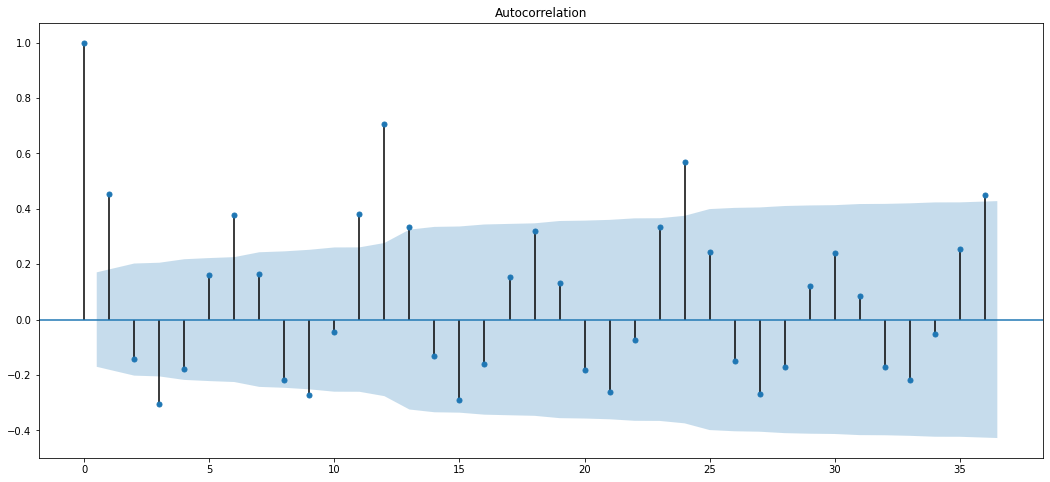

In [179]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=36)
pyplot.show()

### Note that the ACF has at least 2 significant lag values with high coefficient values.

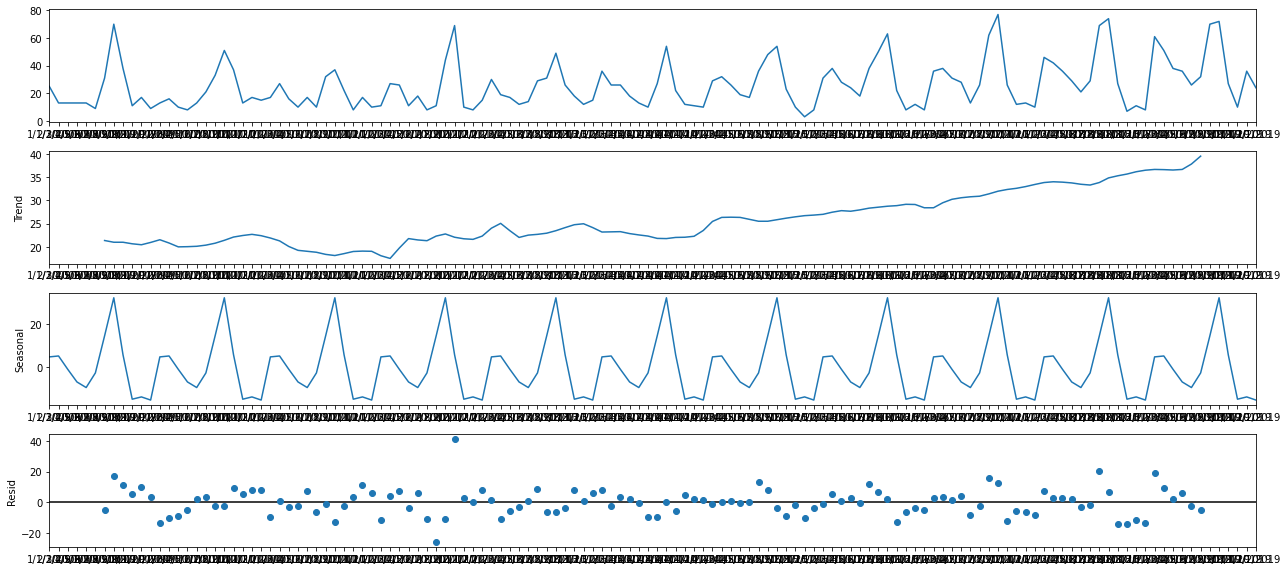

In [175]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
 
rcParams['figure.figsize'] = 18,8
decomposition = seasonal_decompose(series, period=12) # Annual seasonality 
 
fig = decomposition.plot()
pyplot.show()

In [176]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
#from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('small-shop-demand.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
#train, test = X[1:len(X)-700], X[len(X)-700:]
# Pick 80% of the data but keeps the original sequence (R)
train = X[:int(X.shape[0]*0.8)]
test = X[int(X.shape[0]*0.8):]

Test RMSE: 17.959


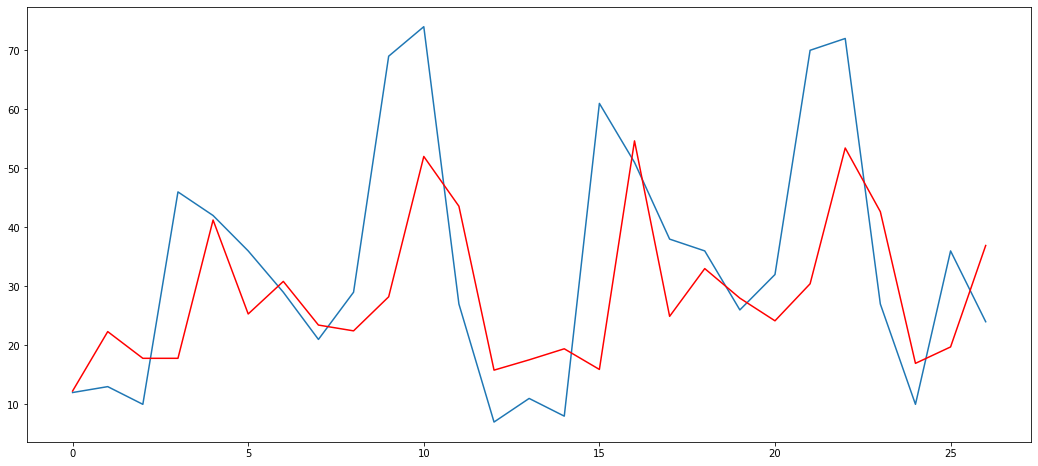

In [177]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
  model = ARIMA(history, order=(0,0,2))
  ##model = ARIMA(history, order=(0,2,2))
  ##model = ARIMA(history, order=(2,2,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [178]:
from statsmodels.tsa.arima_model import ARIMA
##ts_log = np.log(series)
model = ARIMA(ts_log,order=(0,0,2))
resultsMA = model.fit(disp=-1)
resultsMA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                     ARMA(0, 2)   Log Likelihood                -107.750
Method:                       css-mle   S.D. of innovations              0.546
Date:                Wed, 05 May 2021   AIC                            223.500
Time:                        03:14:54   BIC                            235.031
Sample:                             0   HQIC                           228.185
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0538      0.087     34.991      0.000       2.883       3.225
ma.L1.y        0.6486      0.089      7.285      0.000       0.474       0.823
ma.L2.y        0.1940      0.096      2.025      0.043       0.006       0.382
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.6719           -1.5362j            2.2705           -0.3817
MA.2           -1.6719           +1.5362j            2.2705            0.3817
-----------------------------------------------------------------------------
"""